# 作业七
编程实现DBSCAN对下列数据的聚类

# 导库与全局设置

In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import datasets
import pandas as pd

In [2]:
plt.rcParams['font.sans-serif'] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

## DBSCAN 聚类参数说明

eps：ϵ-邻域的距离阈值，和样本距离超过ϵ的样本点不在ϵ-邻域内，默认值是0.5。

min_samples：形成高密度区域的最小点数。作为核心点的话邻域(即以其为圆心，eps为半径的圆，含圆上的点)中的最小样本数(包括点本身)。

若y=-1，则为异常点

由于DBSCAN生成的类别不确定，因此定义一个函数用来筛选出符合指定类别的最合适的参数。

合适的标准是异常点个数最少

In [3]:
def search_best_parameter(N_clusters, X):
    min_outliners = 999
    best_eps = 0
    best_min_samples = 0
    # 迭代不同的eps值
    for eps in np.arange(0.001, 1, 0.05):
        # 迭代不同的min_samples值
        for min_samples in range(2, 10):
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            # 模型拟合
            y = dbscan.fit_predict(X)
            # 统计各参数组合下的聚类个数（-1表示异常点）
            if len(np.argwhere(y == -1)) == 0:
                n_clusters = len(np.unique(y))
            else:
                n_clusters = len(np.unique(y)) - 1
            # 异常点的个数
            outliners = len([i for i in y if i == -1])
            if outliners < min_outliners and n_clusters == N_clusters:
                min_outliners = outliners
                best_eps = eps
                best_min_samples = min_samples
    return best_eps, best_min_samples

In [4]:
# 导入数据
colors = ['green', 'red', 'blue']
smile = loadmat('data-密度聚类/smile.mat')

# smile数据

In [5]:
X = smile['smile']
eps, min_samples = search_best_parameter(3, X)
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
y = dbscan.fit_predict(X)

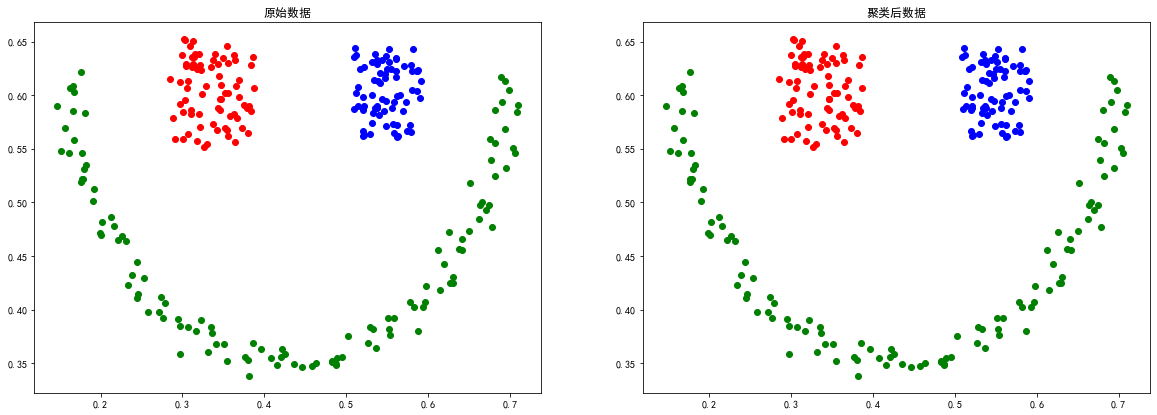

In [6]:
# 聚类结果可视化
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
for i in range(len(smile['smile'])):
    plt.scatter(smile['smile'][i][0], smile['smile'][i][1],
                color=colors[int(smile['smile'][i][2])])
    plt.title("原始数据")
plt.subplot(2, 2, 2)
for i in range(len(y)):
    plt.scatter(smile['smile'][i][0], smile['smile'][i][1], color=colors[y[i]])
    plt.title("聚类后数据")

# sizes5数据

In [7]:
# 导入数据
colors = ['blue', 'green', 'red', 'black', 'yellow']
sizes5 = loadmat('data-密度聚类/sizes5.mat')

In [8]:
X = sizes5['sizes5']
eps, min_samples = search_best_parameter(4, X)
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
y = dbscan.fit_predict(X)

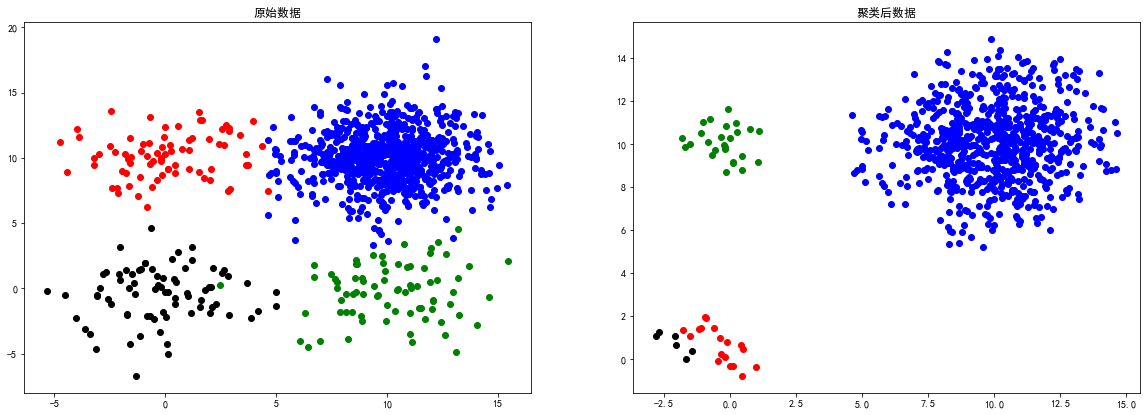

In [9]:
# 聚类结果可视化
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
for i in range(len(sizes5['sizes5'])):
    plt.scatter(sizes5['sizes5'][i][0], sizes5['sizes5']
                [i][1], color=colors[int(sizes5['sizes5'][i][2])])
    plt.title("原始数据")
plt.subplot(2, 2, 2)
for i in range(len(y)):
    if y[i] != -1:
        plt.scatter(sizes5['sizes5'][i][0], sizes5['sizes5']
                    [i][1], color=colors[y[i]])
        plt.title("聚类后数据")

# square1数据

In [10]:
# 导入数据
colors = ['green', 'red', 'blue', 'black']
square1 = loadmat('data-密度聚类/square1.mat')

In [11]:
X = square1['square1']
eps, min_samples = search_best_parameter(4, X)
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
y = dbscan.fit_predict(X)

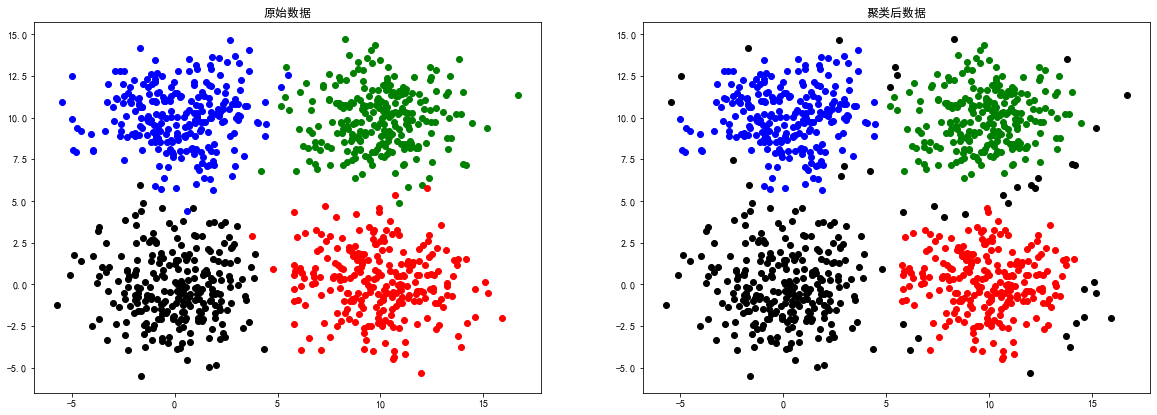

In [12]:
# 聚类结果可视化
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
for i in range(len(square1['square1'])):
    plt.scatter(square1['square1'][i][0], square1['square1']
                [i][1], color=colors[int(square1['square1'][i][2])])
    plt.title("原始数据")
plt.subplot(2, 2, 2)
for i in range(len(y)):
    plt.scatter(square1['square1'][i][0], square1['square1']
                [i][1], color=colors[y[i]])
    plt.title("聚类后数据")

# square4数据

In [13]:
# 导入数据
colors = ['blue', 'green', 'red', 'black',
          'yellow', 'brown', 'orange', 'purple']
square4 = loadmat('data-密度聚类/square4.mat')

In [14]:
X = square4['b']
eps, min_samples = search_best_parameter(5, X)
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
y = dbscan.fit_predict(X)

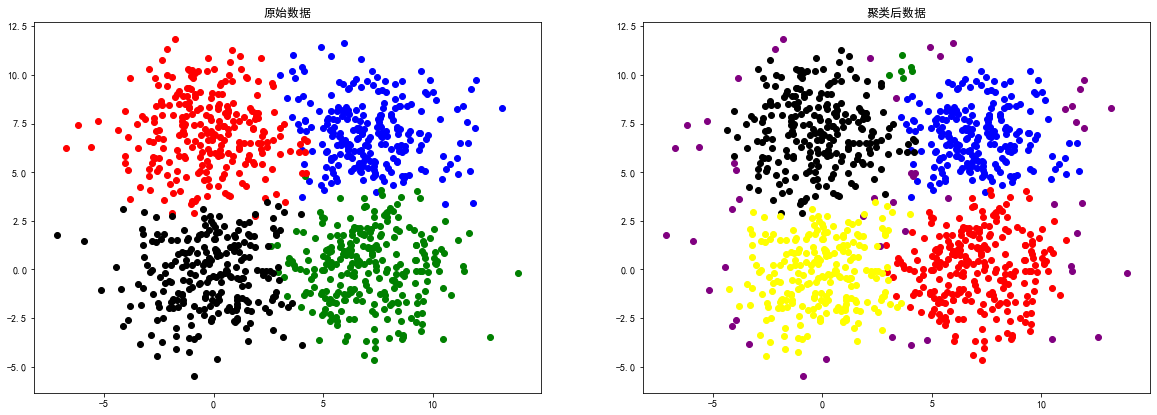

In [15]:
# 聚类结果可视化
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
for i in range(len(square4['b'])):
    plt.scatter(square4['b'][i][0], square4['b']
                [i][1], color=colors[int(square4['b'][i][2])])
    plt.title("原始数据")
plt.subplot(2, 2, 2)
for i in range(len(y)):
    plt.scatter(square4['b'][i][0], square4['b']
                [i][1], color=colors[y[i]])
    plt.title("聚类后数据")

# spiral数据

In [16]:
# 导入数据
colors = ['green', 'red']
spiral = loadmat('data-密度聚类/spiral.mat')

In [17]:
X = spiral['spiral']
eps, min_samples = search_best_parameter(2, X)
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
y = dbscan.fit_predict(X)

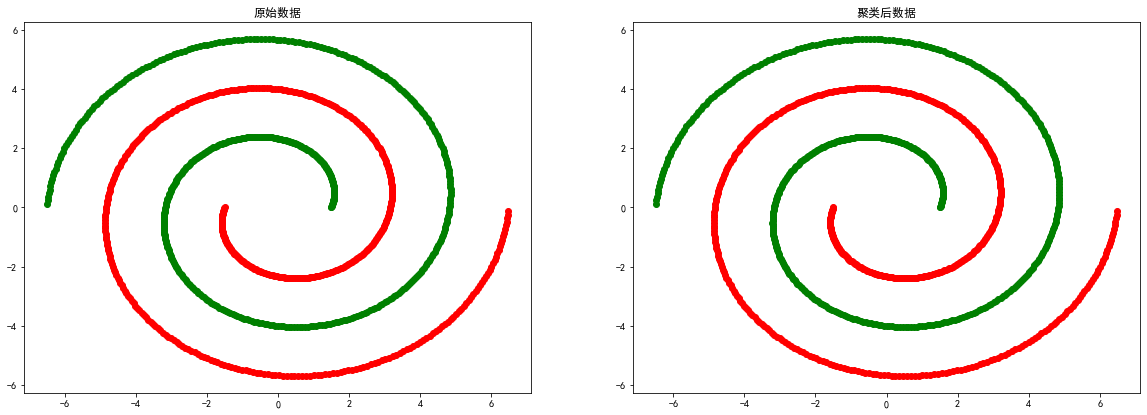

In [18]:
# 聚类结果可视化
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
for i in range(len(spiral['spiral'])):
    plt.scatter(spiral['spiral'][i][0], spiral['spiral']
                [i][1], color=colors[int(spiral['spiral'][i][2])])
    plt.title("原始数据")
plt.subplot(2, 2, 2)
for i in range(len(y)):
    plt.scatter(spiral['spiral'][i][0], spiral['spiral']
                [i][1], color=colors[y[i]])
    plt.title("聚类后数据")

# moon数据

In [19]:
# 导入数据
colors = ['green', 'red']
moon = loadmat('data-密度聚类/moon.mat')

In [20]:
X = moon['a']
eps, min_samples = search_best_parameter(2, X)
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
y = dbscan.fit_predict(X)

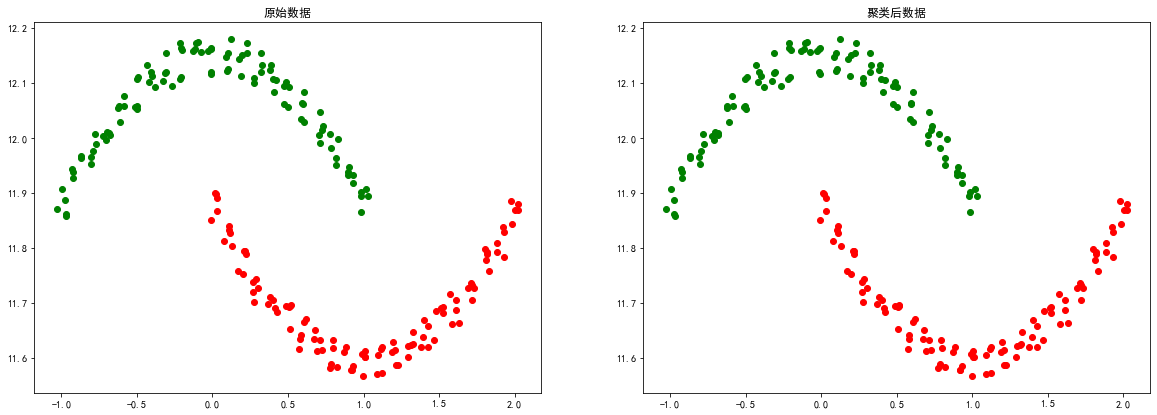

In [21]:
# 聚类结果可视化
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
for i in range(len(moon['a'])):
    plt.scatter(moon['a'][i][0], moon['a']
                [i][1], color=colors[int(moon['a'][i][2])])
    plt.title("原始数据")
plt.subplot(2, 2, 2)
for i in range(len(y)):
    plt.scatter(moon['a'][i][0], moon['a']
                [i][1], color=colors[y[i]])
    plt.title("聚类后数据")

# long数据

In [22]:
# 导入数据
colors = ['green', 'red']
long = loadmat('data-密度聚类/long.mat')

In [23]:
X = long['long1']
eps, min_samples = search_best_parameter(2, X)
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
y = dbscan.fit_predict(X)

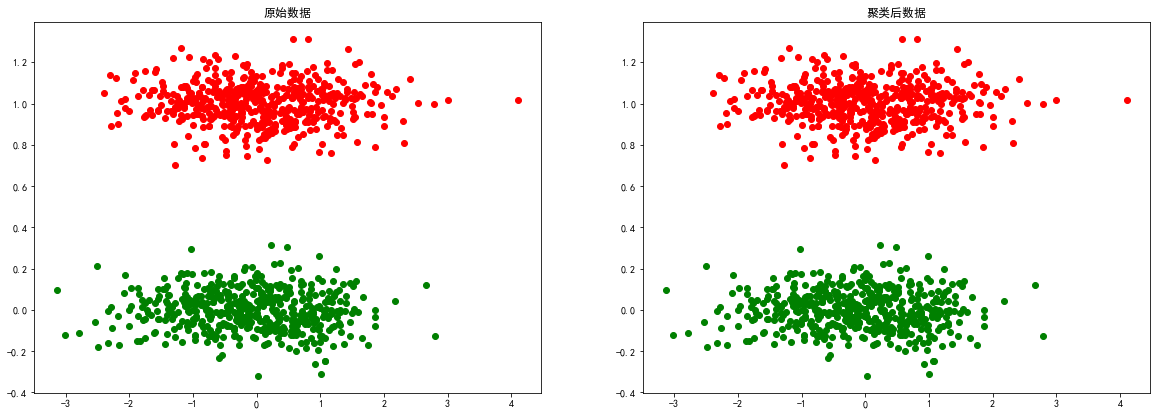

In [24]:
# 聚类结果可视化
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
for i in range(len(long['long1'])):
    plt.scatter(long['long1'][i][0], long['long1']
                [i][1], color=colors[int(long['long1'][i][2])])
    plt.title("原始数据")
plt.subplot(2, 2, 2)
for i in range(len(y)):
    plt.scatter(long['long1'][i][0], long['long1']
                [i][1], color=colors[y[i]])
    plt.title("聚类后数据")

# 2d4c数据

In [25]:
# 导入数据
colors = ['green', 'red', 'blue', 'black']
d4c = loadmat('data-密度聚类/2d4c.mat')

In [26]:
X = d4c['a']
eps, min_samples = search_best_parameter(4, X)
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
y = dbscan.fit_predict(X)

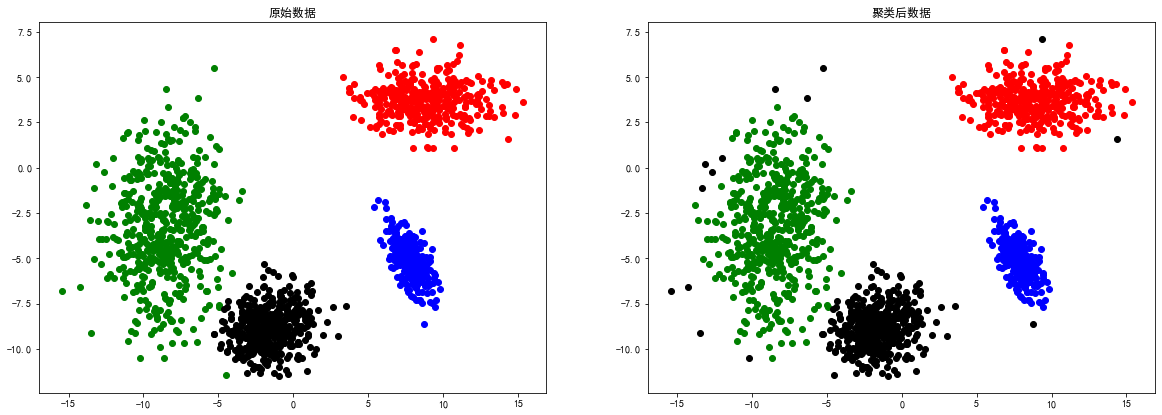

In [27]:
# 聚类结果可视化
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
for i in range(len(d4c['a'])):
    plt.scatter(d4c['a'][i][0], d4c['a']
                [i][1], color=colors[int(d4c['a'][i][2])])
    plt.title("原始数据")
plt.subplot(2, 2, 2)
for i in range(len(y)):
    plt.scatter(d4c['a'][i][0], d4c['a']
                [i][1], color=colors[y[i]])
    plt.title("聚类后数据")

# 总结
上述实验证明了DBSCAN聚类方法比较依赖数据点位置上的关联度，对于smile、spiral等分布的数据聚类效果较好。